# Import Libraries

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset

In [2]:
df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      568454 non-null  int64  
 1   ProductId               568454 non-null  object 
 2   UserId                  568454 non-null  object 
 3   ProfileName             568428 non-null  object 
 4   HelpfulnessNumerator    568454 non-null  int64  
 5   HelpfulnessDenominator  568454 non-null  int64  
 6   Score                   568454 non-null  int64  
 7   Time                    568454 non-null  int64  
 8   Summary                 568427 non-null  object 
 9   Text                    568454 non-null  object 
 10  Polarity                568454 non-null  float64
 11  Sentiment               568454 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 52.0+ MB


In [50]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Polarity
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05,568454.000000
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09,0.241593
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07,0.224809
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08,-1.000000
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09,0.106250
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09,0.231818
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09,0.371861
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09,1.000000


In [52]:
df.size

6821448

In [54]:
df.shape

(568454, 12)

# Handle missing values

In [4]:
df['Text'] = df['Text'].fillna('')

# Sentiment Polarity Calculation

In [6]:
df['Polarity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Sentiment Distribution Pie Chart

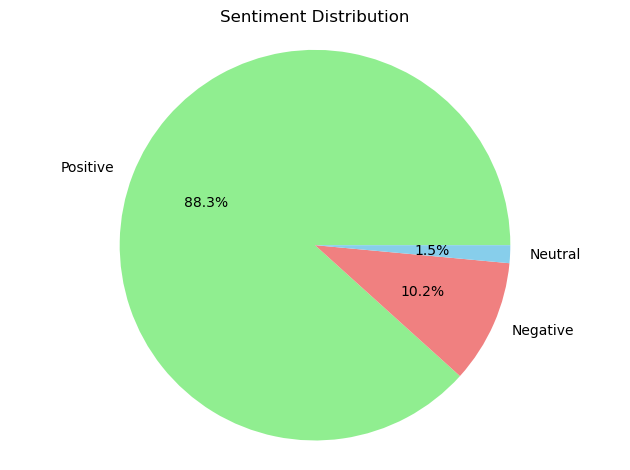

In [8]:
df['Sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['lightgreen', 'lightcoral', 'skyblue'],title="Sentiment Distribution",ylabel='')
plt.axis('equal')
plt.tight_layout()
plt.show()

# WordCloud for Positive Reviews

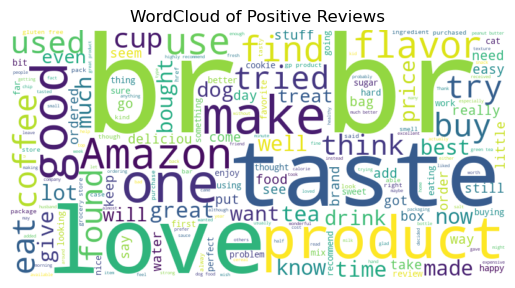

In [10]:
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Text'].dropna())
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Positive Reviews")
plt.show()

# WordCloud for Negative Reviews

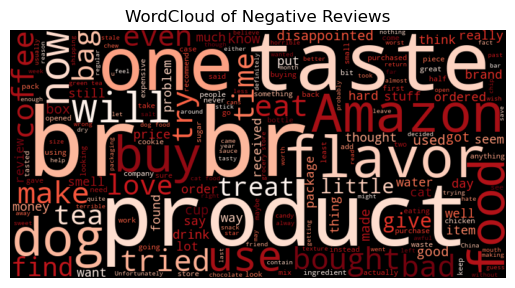

In [12]:
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Text'].dropna())
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Negative Reviews")
plt.show()

#  Bar Plot: Sentiment Count

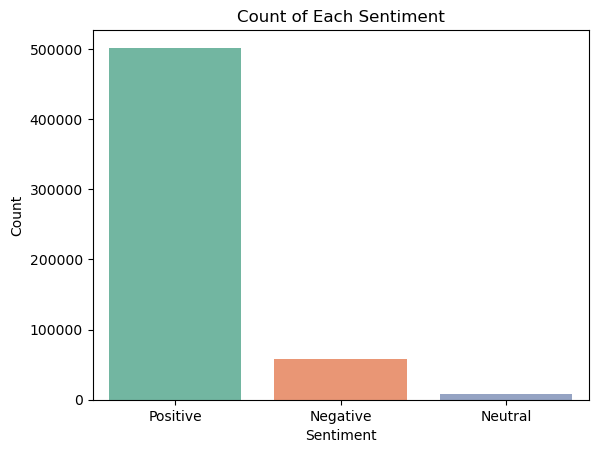

In [38]:
sns.countplot(x='Sentiment', hue='Sentiment', data=df, palette='Set2', legend=False)
plt.title("Count of Each Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Sentiment vs Score 

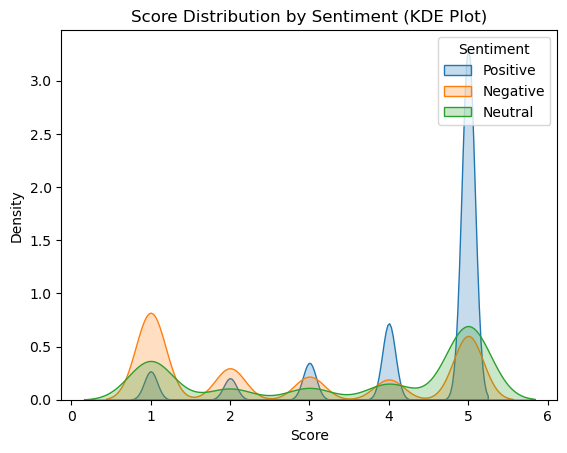

In [46]:
for sentiment in df['Sentiment'].unique():
    sns.kdeplot(data=df[df['Sentiment'] == sentiment], x='Score', label=sentiment, fill=True)

plt.title("Score Distribution by Sentiment (KDE Plot)")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend(title="Sentiment")
plt.show()

# Insights
- Most of the product reviews are Positive, indicating high customer satisfaction.
- Negative reviews make up a smaller share, useful for identifying product issues.
- Positive reviews frequently mention keywords like 'good', 'great', 'excellent'.
- Score ratings generally align with sentiment polarity.
- This analysis can help brands prioritize customer feedback and improve products.